**Структура проекта:**
    
<a href='#1'><h5>1. Загрузка и предобработка данных </a>
<h5>2. Приоритезация гипотез
<a href='#2'><h5>2.1 Применение фреймворк ICE </a>
<a href='#3'><h5>2.2 Применение фреймворк RICE </a>   
<a href='#4'><h5>3. Анализ A/B-теста </a>
<a href='#5'><h5>4. Принятие решения. Итоги анализа </a>

**Проект "Приоритизация гипотез". Приоритизация гипотез по увеличению продаж.**

Нам предстоит провести приоритизация гипотез по увеличению продаж выдвинутых совместно с отделом маркетинга.
**Главная цель проекта** - принять решение о целесообразности дальнейшего проведения теста.

**Часть 1. Загрузка данных.**


**Часть 2. Приоритизация гипотез.**

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина 
с указанными параметрами Reach, Impact, Confidence, Effort.

- Применим фреймворк ICE для приоритизации гипотез.
- Применим фреймворк RICE для приоритизации гипотез.
- Покажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Почему так произошло?

**Часть 3. Анализ A/B-теста**

На основе полученных результатов проанализируем A/B-тест:
- [x] Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
- [x] Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
- [x] Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
- [x] Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.
- [x] Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.
- [x] Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
- [x] Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- [x] Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
- [x] Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- [x] Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.
- [x] Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
- [x] Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.
- [x] Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

**Часть 4. Принятие решения по результатам теста. Варианты решений:**

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

## Загрузка и предобработка данных <a id='1'></a>

In [2]:
# загрузка библиотек

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
# конвертеры, которые позволяют использовать типы pandas в matplotlib 
register_matplotlib_converters()

In [4]:
# установим ширину столбцов, чтобы строки были видны полностью
pd.set_option('max_colwidth', 130) 

hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# загрузим данные преобразуем дату

orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [6]:
orders.info()
orders.head(3)
print()
visitors.info()
visitors.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [7]:
# проверим дубликаты
print('Дубликаты orders', orders.duplicated().sum())
print('Дубликаты visitors', visitors.duplicated().sum())

Дубликаты orders 0
Дубликаты visitors 0


## Приоритезация гипотез

### Применим фреймворк ICE <a id='2'></a>

Фреймворк ICE применяется для приоритизации гипотез. ICE (от англ. impact, confidence, effort) Отсортируем их по убыванию приоритета.

In [63]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display((hypothesis.loc[:,['Hypothesis', 'ICE']]).sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Применим фреймворк RICE <a id='3'></a>

Фреймворк RICE прменяется для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Фреймворк RICE состоит из четырёх компонент:
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
- Efforts — сколько стоит протестировать эту гипотезу.

In [64]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display((hypothesis.loc[:,['Hypothesis', 'RICE']]).sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


ТОП 3 по критерию ICE
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

ТОП 3 по критерию RICE
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей


Очевидно, что подобное изменение в приоритетах вызвано тем, что фреймворк ICE Не использует показатель "охват пользователей". Можно предположить, что выбор этого критерия будет предпочтительней т.к. он более полный.

### Анализ A/B-теста <a id='4'></a>

Результаты A/B-теста, описаны в файлах:
- orders.csv
- visitors.csv

#### Для корректного сравнения двух групп вычислим и удалим пользователей попавших в обе группы

In [69]:
# сгруппируем данные по двум группам

display(orders.groupby(by='group')['visitorId'].count())

group
A    557
B    640
Name: visitorId, dtype: int64

In [70]:
gr_A = orders[orders['group'] == 'A']['visitorId'].tolist()
gr_B = orders[orders['group'] == 'B']['visitorId'].tolist()

# cоздаем новую таблицу, без пользователей, которые входили в обе группы
orders = orders.query(
    '(visitorId in @gr_A and visitorId not in @gr_B or (visitorId in @gr_B and visitorId not in @gr_A))')

display(orders.groupby(by='group')['visitorId'].count())

group
A    468
B    548
Name: visitorId, dtype: int64

#### Построим график кумулятивной выручки по группам.

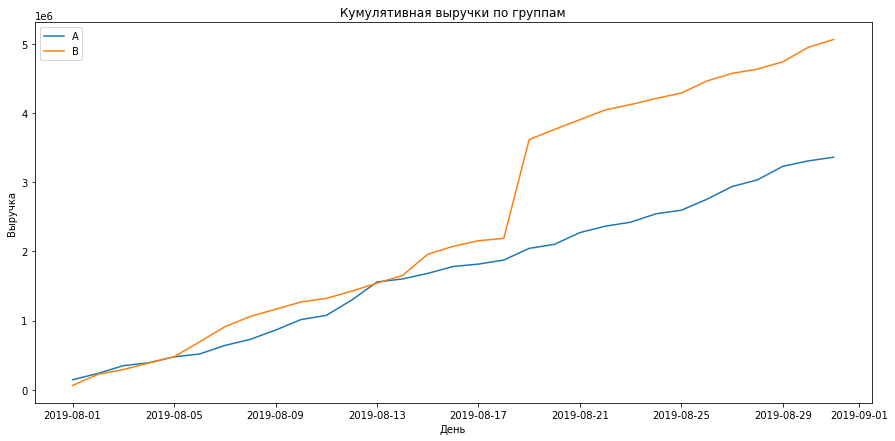

In [71]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,7))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title("Кумулятивная выручки по группам") 
plt.xlabel("День") 
plt.ylabel("Выручка")
plt.legend(); 

По графику видно, что в сегмент В и А имеют примерно равные продажи до 11-15. Начиная с 15 августа группа В значительно опережает группу А. Возможно это вызвано аномально большими заказами.

#### Построим график кумулятивного среднего чека по группам.

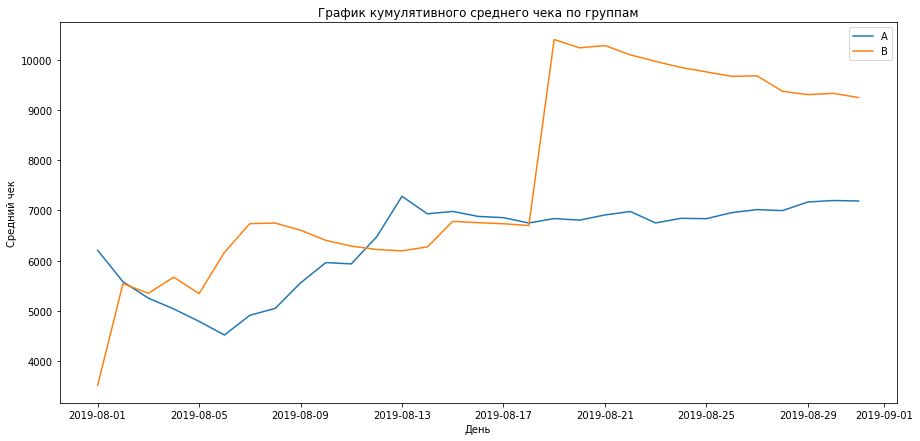

In [72]:
plt.figure(figsize=(15,7))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')

plt.title("График кумулятивного среднего чека по группам") 
plt.xlabel("День") 
plt.ylabel("Средний чек")
plt.legend();

Из графика видно, что средний чек группы В 9-14 числа меньше группы А, по  после 17 числа группа В резко пошла вверх, это так же может свидетельствовать об искажении данных в следствии аномальных продаж.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

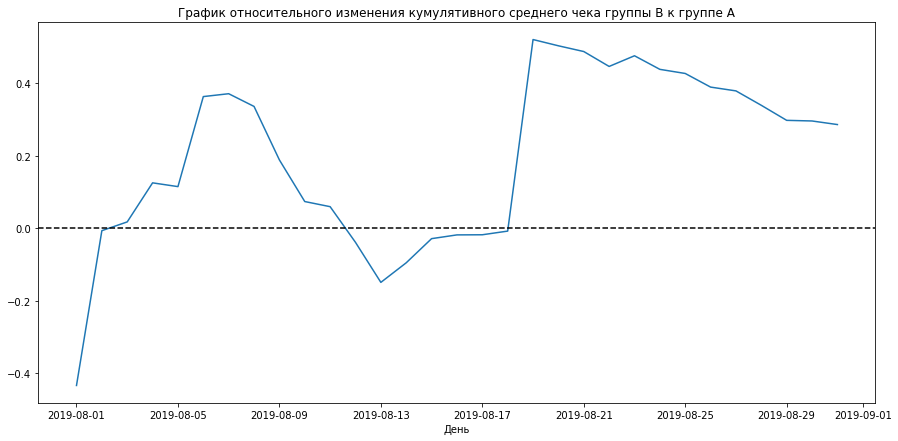

In [73]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A") 
plt.xlabel("День") 

# добавляем ось y
plt.axhline(y=0, color='black', linestyle='--');

На этом графике так же наблюдаем "скачки", это так же может указывать на аномально высокие продажи.

### Построим график кумулятивной конверсии по группам.

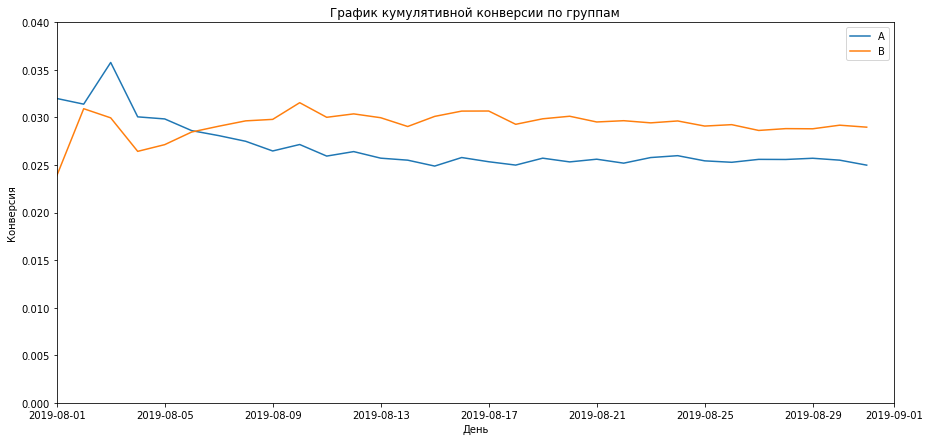

In [74]:
# добавим столбец с конверсией
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']


plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title("График кумулятивной конверсии по группам") 
plt.xlabel("День") 
plt.ylabel("Конверсия")
plt.legend()

# добавим масштам осей, что бы было видно абсолютное значение колебания
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.04]);

* Конверсия группы В после 5 августа стала выше и до конца теста конверсия была примерно одинаковой.
* Из графика видно что общее колебание по двум группам было в диапазоне 0.03 до 0.037.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

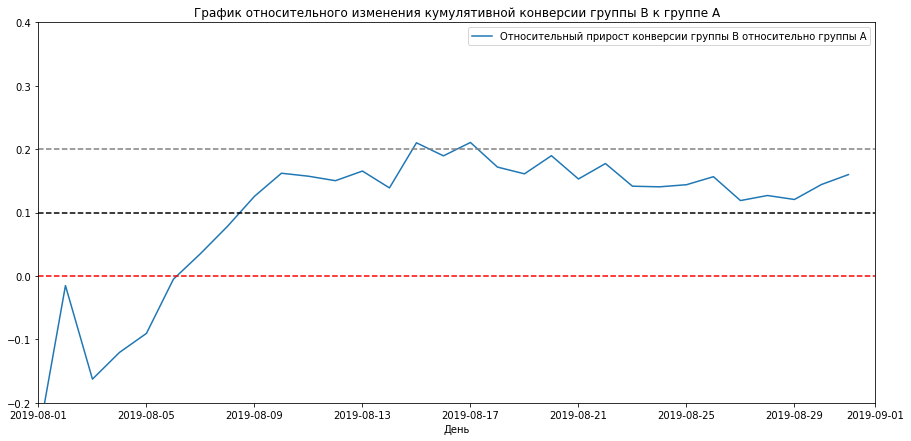

In [75]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.title("График относительного изменения кумулятивной конверсии группы B к группе A") 
plt.xlabel("День") 
plt.legend()

# оси y
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.4]);

* Конверсия группы В после 7 числа стала выше группы А и достигла 20%
* После 17 числа конверсия стала снижаться и дошла до 10% относительно группы А

### Очистка данных от выбросов. Определение выбросов.

#### Построим точечный график количества заказов по пользователям

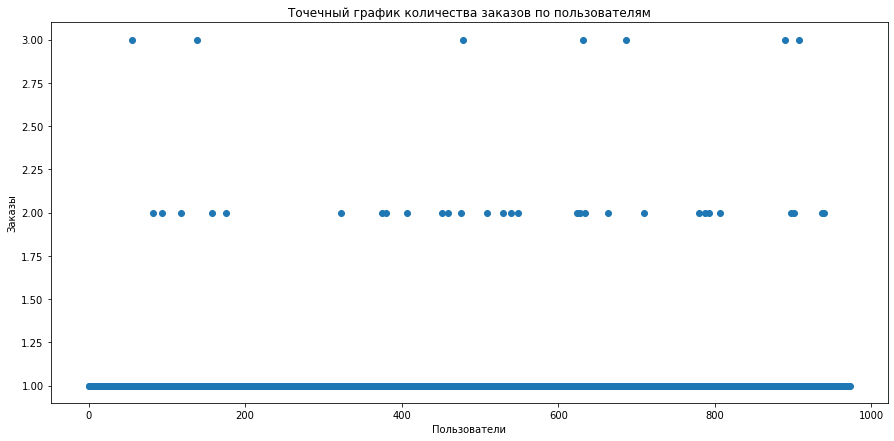

In [76]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

# print(ordersByUsers.sort_values(by='orders', ascending=False))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(15,7))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Точечный график количества заказов по пользователям") 
plt.xlabel("Пользователи") 
plt.ylabel("Заказы");

Пользователей, которые делали больше трех заказов достаточно мало, можно сказать что это аномальные продажи.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [77]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Выберем границу для определения аномальных пользователей: 
* Не более 5% пользователей совершали больше 1 заказов
* Не более 1% пользователей совершали больше 2 заказов
* Зададим границу аномальных пользователей совершивших 2 заказа

### Построим точечный график стоимостей заказов.

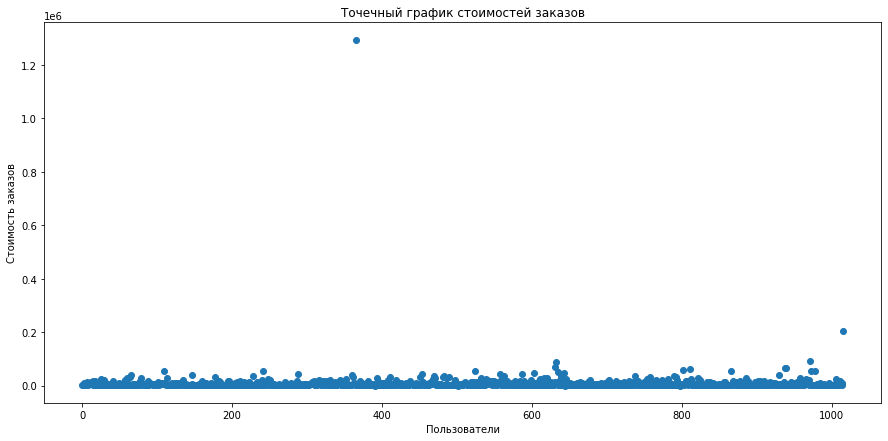

In [78]:
# print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15,7))
plt.scatter(x_values, orders['revenue'])
plt.title("Точечный график стоимостей заказов") 
plt.xlabel("Пользователи") 
plt.ylabel("Стоимость заказов");

Из графика видно два выброса:
* около 200 000 
* около 1 200 000

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [79]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Выберем границу для определения аномальных заказов:
* не более 5% заказов дороже 26785 рублей
* не более 1% заказов дороже 53904 рублей
* зададим границу аномальных заказов 20000 рублей

Проверка гипотез по сырым данным (без удаления выбрасов)

### p-value в конверсии между группами по «сырым» данным

Сформируем Нулевую и Альтернативную гипотезы:
* Нулевая гипотеза: конверсиях между группами по «сырым» данным равна

* Альтернативная гипотеза: конверсиях между группами по «сырым» данным различается

In [80]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(3))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
 
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
 
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
 
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
 
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

alpha = 0.05  # критический уровень статистической значимости


if stats.mannwhitneyu(sampleA, sampleB)[1] < alpha:

    print('Отвергаем нулевую гипотезу: разница статистически значима, p-value =', 
          "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])) 
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя, p-value =', 
        "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
    
    
print( 
 "{0:.3f}".format( 
 (data['ordersPerDateB'].sum() / data['visitorsPerDateB'].sum()) 
 / (data['ordersPerDateA'].sum() / data['visitorsPerDateA'].sum()) 
        - 1
    )
)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803


Отвергаем нулевую гипотезу: разница статистически значима, p-value = 0.01102
0.160


Выводы:
* в конверсия между группами по «сырым» данным различается
* относительная разница среднего группы В к конверсии группы А = 13.8%

### p-value в среднем чеке заказа между группами по «сырым» данным

Сформируем Нулевую и Альтернативную гипотезы:

- Нулевая гипотеза: средний чек между группами по «сырым» данным равна

- Альтернативная гипотеза: средний чек между группами по «сырым» данным различается

In [87]:
if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < alpha:

    print('Отвергаем нулевую гипотезу:  средний чек между группами по «сырым» данным различается , p-value =', 
          '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                              orders[orders['group']=='B']['revenue'])[1])
         ) 
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу,   средний чек между группами по «сырым» данным равна, p-value =', 
        '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                            orders[orders['group']=='B']['revenue'])[1])
    )

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Не получилось отвергнуть нулевую гипотезу,   средний чек между группами по «сырым» данным равна, p-value = 0.829
0.287


Выводы:
* средний чек между группами по «сырым» данным равны
* относительная разница среднего чека В к конверсии группы А = 28.7%

Наблюдаема разница 28,7 % по средним чекам не является статистически значимой, однако нужно обратить внимание на то, что она является достаточно большой.

### Очистим данные

In [82]:
# np.percentile(orders['revenue'], [95, 99])[1] примерно 40 000
# заданная граница в ручную

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['visitorId'],
    ],
    axis=0,
)


usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[1]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print()
# shape[0] длинна таблицы
print('Аномальные покупатели', abnormalUsers.shape[0]) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64

Аномальные покупатели 16


### p-value в конверсии между группами по «очищенным» данным

Сформируем Нулевую и Альтернативную гипотезы:
* Нулевая гипотеза: конверсиях между группами по «очищенным» данным равна

* Альтернативная гипотеза: конверсиях между группами по «очищенным» данным различается

In [90]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha:

    print('Отвергаем нулевую гипотезу: конверсиях между группами по «очищенным» данным различается, p-value =', 
          '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])) 
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, конверсии между группами по «очищенным» данным равны, p-value =', 
        '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Отвергаем нулевую гипотезу: конверсиях между группами по «очищенным» данным различается, p-value = 0.00702
0.189


Вывод 
- P-value - уменьшился с 0.01381 до 0.00702 
- Как в сырых так и в обработанных данных есть статистическая значимость.
- 18.9%  достаточна статистическая значимость

### p-value в среднем чеке заказа между группами по «очищенным» данным

Сформируем Нулевую и Альтернативную гипотезы:

Нулевая гипотеза: средний чек между группами по «очищенным» данным равна

Альтернативная гипотеза: средний чек между группами по «очищенным» данным различается

In [84]:
if stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1] < alpha:

    print('Принимаем альтернативную гипотезу: средний чек между группами по «очищенным» данным различается , p-value =', 
          '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1])
         ) 
else:
    print('Принимаем нулевую гипотезу,  средний чек между группами по ««очищенным» данным равна, p-value =',
        '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1])
    )



print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Принимаем нулевую гипотезу,  средний чек между группами по ««очищенным» данным равна, p-value = 0.788
-0.032


Выводы:
- P-value изменился с 0.01679 до 0.788, но всё так же нет статистически значимых различий

- Относительное различие среднего чека между группами стало отрицательным 0.32%

При alpha = 0.05  (критический уровень статистической значимости)  относительное различие не является статистически значимым.

### Принятие решения. Итоги анализа. <a id='5'></a>

**Варианты  дальнейших действий**

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Подведем итоги:**
- На основе графика хорошо видно, что кумулятивная выручка группы В выше
- На основе графика хорошо видно, что кумулятивный средний чек группы В выше
- На основе графика хорошо видно, что кумулятивная конверсия группы В выше


**При критическом уровень статистической значимости alpha = 0.05:**

* конверсия между группами по «сырым» данным различается
* средние чеки между группами по «сырым» данным равны
* относительная разница среднего чека В к конверсии группы А = 28.7%

* отвергаем нулевую гипотезу: конверсиях между группами по «очищенным» данным различается
* средние чеки между группами по ««очищенным» данным равны

Ориентируясь на графики и большую конверсию относительной разницы среднего чека группы В к группе А равной 28.7% принимаем решение, остановить тест. Признать победу группы В над группой А.